In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import keras
import tensorflow as tf

from statsmodels.nonparametric.smoothers_lowess import lowess
from numpy import array
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras import metrics
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

## ==============================
### DATA PREPARATION
## ==============================

In [23]:
# Load the dataset
dataset = r"D:\Documents\MASTER OF DATA SCIENCE\Research Project\Dataset\FILTERED DATASET.xlsx"
df = pd.read_excel(dataset).reset_index(drop=True)
# df

In [ ]:
scaler = RobustScaler()
data_scaled = scaler.fit_transform(df)

features = data_scaled[:, 1:]
target = data_scaled[:,0]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

print(f'Train dataset shape: {x_train.shape}')
print(f'Target train dataset shape: {y_train.shape}')
print(f'Test dataset shape: {x_test.shape}')
print(f'Target test dataset shape: {y_test.shape}')

Train dataset shape: (1276, 7)
Target train dataset shape: (1276,)
Test dataset shape: (548, 7)
Target test dataset shape: (548,)


In [25]:
time_steps = 90
num_features = 7
batch_size = 32

train_generator = TimeseriesGenerator(x_train, y_train, length=time_steps, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=time_steps, sampling_rate=1, batch_size=batch_size)

## ==============================
### MODELLING
## ==============================

In [28]:
initializer = tf.keras.initializers.HeUniform()

In [31]:
lstm_model = keras.models.Sequential(
    [   
        # Input Layer
        keras.layers.InputLayer(shape=(time_steps, num_features), batch_size=batch_size,name="Input_Layer"),

        # First LSTM layer
        keras.layers.LSTM(50, activation='relu', return_sequences=False, kernel_initializer=initializer, name="LSTM_Layer_1"),
        keras.layers.BatchNormalization(),

        # Final Dense layer for output
        keras.layers.Dense(1, name="Output_Layer")
    ],
    name="lstm_time_model"
)

In [32]:
lstm_model.summary()

Model: "lstm_time_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_Layer_1 (LSTM)             │ (32, 50)               │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (32, 50)               │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (32, 1)                │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,851 (46.29 KB)

 Trainable params: 11,751 (45.90 KB)

 Non-trainable params: 100 (400.00 B)

In [35]:
# Compile the model
opt = keras.optimizers.SGD(learning_rate=0.001)
lstm_model.compile(optimizer=opt, loss="mse")

# Fit the model
epochs = 100
history = lstm_model.fit(train_generator, epochs=epochs, validation_data=test_generator, shuffle=False)

Epoch 1/100


c:\Users\User\anaconda3\envs\DSC790_DSProject\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1.7328 - val_loss: 0.8442
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.3523 - val_loss: 0.8259
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.1454 - val_loss: 0.8188
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.0169 - val_loss: 0.8147
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.9283 - val_loss: 0.8105
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.8636 - val_loss: 0.8051
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.8139 - val_loss: 0.7984
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7747 - val_loss: 0.7913
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7438 - val_loss: 0.7845
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7198 - val_loss: 0.7778
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7005 - val_loss: 0.7714
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.6

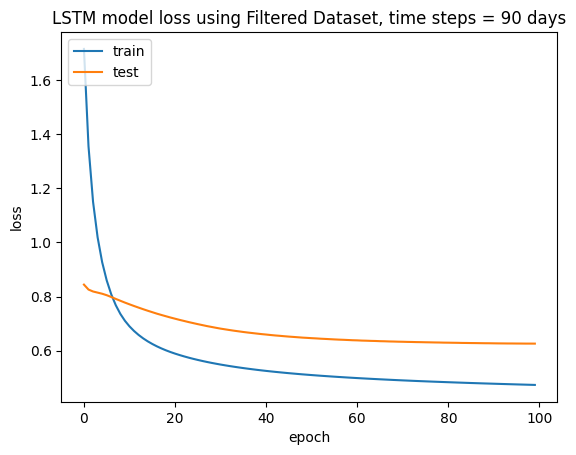

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM model loss using Filtered Dataset, time steps = 90 days')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Make predictions
predictions = lstm_model.predict(test_generator)  # Shape (n_samples, 1)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(y_test - predictions))

#  Mean Squared Error (MSE)
mse = np.mean((y_test - predictions) ** 2)

# Root Mean Square Error (RMSE)
rmse = np.sqrt(np.mean((y_test - predictions) ** 2))

# Print metrics
print(f"Final Mean Absolute Error (MAE): {round(mae, 3)}")
print(f"Mean Squared Error (MSE): {round(mse, 3)}")
print(f"Final Root Mean Square Error (RMSE): {round(rmse, 3)}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Final Mean Absolute Error (MAE): 0.624
Mean Squared Error (MSE): 0.637
Final Root Mean Square Error (RMSE): 0.798


In [38]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[time_steps:])], axis=1)
rev_trans = scaler.inverse_transform(df_pred)

rev_trans.shape

(458, 8)

In [39]:
df_final =df[predictions.shape[0]*-1:]
df_final.count()

Power Generation (MW)                    458
Minimum Temperature (deg C)              458
Mean Temperature (deg C)                 458
Mean Dew Point Temperature (dec C)       458
Hargreaves Potential Evaporation (mm)    458
Eastward Wind Component (m/s)            458
Northward Wind Component (m/s)           458
Surface Pressure (kPa)                   458
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_4332\4286327339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[:, 'Forecasted Power Generation'] = rev_trans[:, 0]


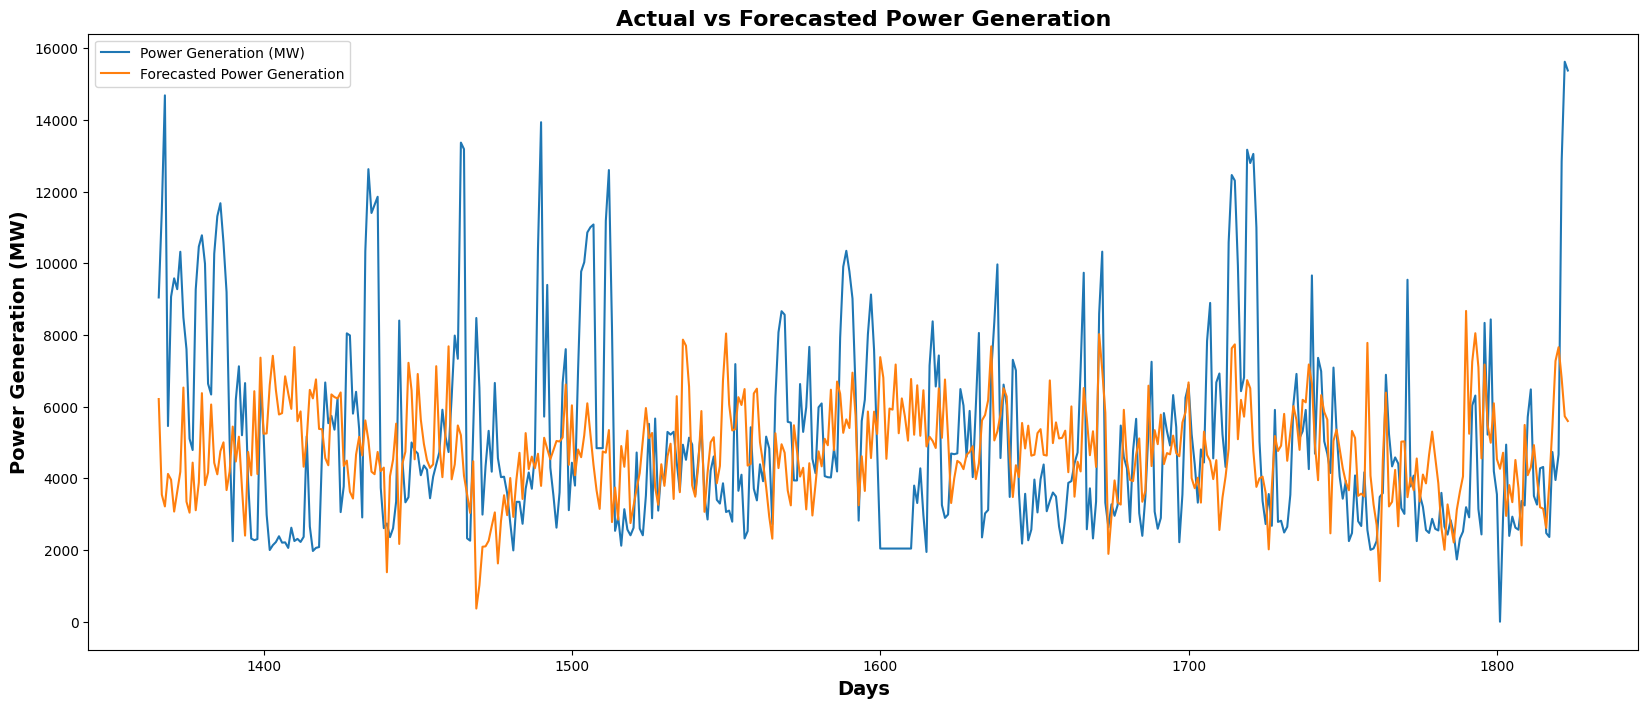

In [40]:
# Use .loc to explicitly assign values in the 'Forecasted Power Generation' column
df_final.loc[:, 'Forecasted Power Generation'] = rev_trans[:, 0]

df_final[['Power Generation (MW)', 'Forecasted Power Generation']].plot(figsize=(20,8))
plt.title('Actual vs Forecasted Power Generation', fontsize=16, fontweight='bold')
plt.xlabel('Days', fontsize=14, fontweight='bold') 
plt.ylabel('Power Generation (MW)', fontsize=14, fontweight='bold')
plt.show()  # Display the plot

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


C:\Users\User\AppData\Local\Temp\ipykernel_4332\3379280084.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  input_sequence[-1, 0] = next_pred  # Update the first feature with the predicted value


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━

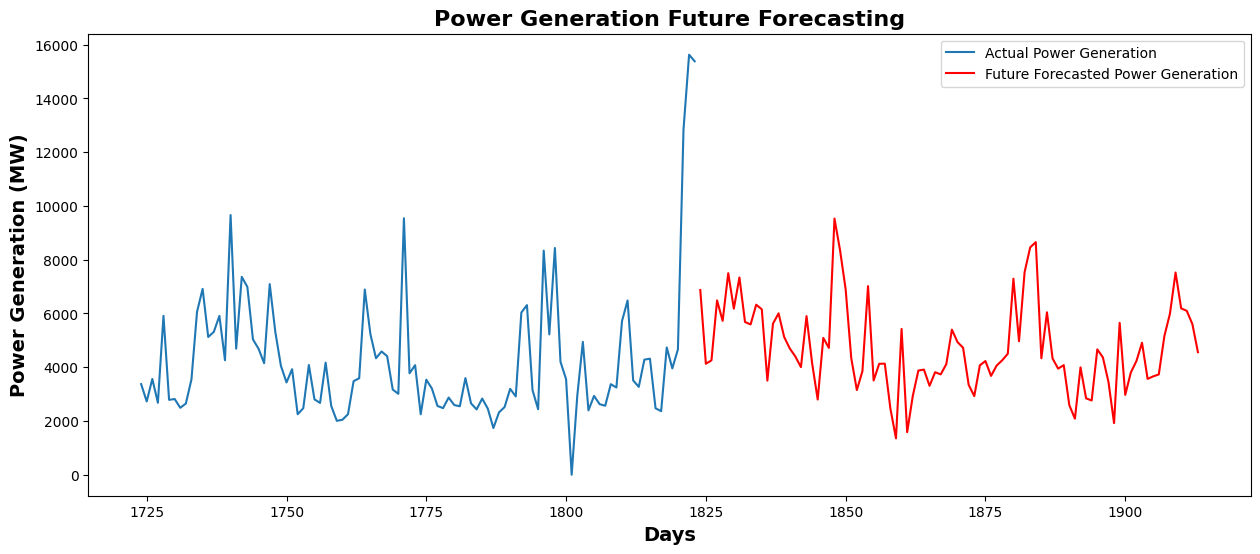

In [42]:
# Number of future time steps you want to forecast
future_steps = 90  # Example: Predicting 30 future time steps

# Step 1: Prepare the input for future prediction
# We will start with the last 'time_steps' values from the test set
input_sequence = x_test[-time_steps:]  # Last 'time_steps' values from the test set

# List to store future predictions
future_predictions = []

# Predict future values step by step
for _ in range(future_steps):
    # Make prediction
    next_pred = lstm_model.predict(input_sequence.reshape(1, time_steps, num_features))
    future_predictions.append(next_pred[0, 0])

    # Update the input sequence for the next prediction
    input_sequence = np.roll(input_sequence, shift=-1, axis=0)  # Shift input sequence
    input_sequence[-1, 0] = next_pred  # Update the first feature with the predicted value

# Step 2: Combine predictions with the original features
# Here we concatenate the predicted future values with the original features to maintain structure
df_pred_ftr = pd.concat([pd.DataFrame(future_predictions), pd.DataFrame(x_test[-future_steps:])], axis=1)

# Step 3: Inverse transform the predictions to the original scale
rev_trans = scaler.inverse_transform(df_pred_ftr)

# The forecasted power generation is now in the first column
future_predictions_rev = rev_trans[:, 0]

# Step 4: Create a DataFrame for future predictions
# Generate a sequence of "days" (i.e., row numbers) starting from the last row in the original dataset
future_days = np.arange(len(df), len(df) + future_steps)  # Adjust future_days to match forecast length

# Create the DataFrame for future predictions
future_df = pd.DataFrame(future_predictions_rev, columns=['Future Forecasted Power Generation'], index=future_days)

# Step 5: Plotting the last 100 days and future forecasted values
import matplotlib.pyplot as plt

# Select the last 100 days of the actual data
last_100_actual = df['Power Generation (MW)'].iloc[-100:]

# Plot actual (last 100 days) and forecasted values
plt.figure(figsize=(15, 6))
plt.plot(np.arange(len(df)-100, len(df)), last_100_actual, label='Actual Power Generation (2019-2023)')  # Last 100 days
plt.plot(future_df.index, future_df['Future Forecasted Power Generation'], label='Future Forecasted Power Generation (90 days)', color='red')
plt.xlabel('Days', fontsize=14, fontweight = 'bold')
plt.ylabel('Power Generation (MW)', fontsize=14, fontweight = 'bold')
plt.title('Power Generation Future Forecasting', fontsize=16, fontweight = 'bold')
plt.legend()
plt.show()